Clear memory :

In [1]:
%reset -f

# Data Wrangling:

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Import All Libraries:

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from pprint import pprint

###Import Dataset:

The Dataset (Kaggle link is [here to download](https://www.kaggle.com/datasets/inigolopezrioboo/a-tripadvisor-dataset-for-nlp-tasks)) consist Restaurant Reviews of Six Cities in the World (Barcelona, London, Paris, Madrid, New York and New Delhi).

We will consider the dataset from Paris for our analysis.



In [4]:
paris = pd.read_csv('gdrive/My Drive/Colab Notebooks/TripAdvisor Review NLP Analysis/data/Paris_reviews.csv')
paris.head()

,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
0,0,1,Mamie_Bidoche,5,Positive,review_749039451,Diner before party,The waiter was very enthusiastic and caring.Th...,The waiter was very enthusiastic and caring.Th...,"March 4, 2020",Paris_Ile_de_France,https://www.tripadvisor.com/Restaurant_Review-...,UID_0
1,1,2,Mamie_Bidoche,5,Positive,review_744667831,Great place..,"Lovely friendly bistro, great food. Menu not e...","Lovely friendly bistro, great food. Menu not e...","February 12, 2020",Paris_Ile_de_France,https://www.tripadvisor.com/Restaurant_Review-...,UID_1
2,2,3,Mamie_Bidoche,5,Positive,review_736647328,Good experience,"Great dishes based on meat, fine drinks. Reall...","Great dishes based on meat, fine drinks. Reall...","January 3, 2020",Paris_Ile_de_France,https://www.tripadvisor.com/Restaurant_Review-...,UID_2
3,3,4,Mamie_Bidoche,5,Positive,review_707079845,Excellent !,"The food is delicious, the decoration is amazi...","The food is delicious, the decoration is amazi...","September 5, 2019",Paris_Ile_de_France,https://www.tripadvisor.com/Restaurant_Review-...,UID_3
4,4,5,Mian_Fan,5,Positive,review_728787616,Great Food and Service,This is a great place to hangout with friends ...,This is a great place to hangout with friends ...,"November 25, 2019",Paris_Ile_de_France,https://www.tripadvisor.com/Restaurant_Review-...,UID_4


###Modify Data for Text Analysis (Data Preprocessing):

In [5]:
## Delete Unnecessary Columns:
paris.drop(columns=["Unnamed: 0","parse_count","review_id","url_restaurant","author_id","date","title_review","review_preview","city"],inplace=True)

In [7]:
## Delete all Null rows:
paris= paris.dropna(how='any',axis=0)

In [8]:
## Change Variable(Column Type):
paris['rating_review'] = paris['rating_review'].astype('float')
paris['rating_review'] = paris['rating_review'].astype('int64')

In [9]:
paris.head()

,restaurant_name,rating_review,sample,review_full
0,Mamie_Bidoche,5,Positive,The waiter was very enthusiastic and caring.Th...
1,Mamie_Bidoche,5,Positive,"Lovely friendly bistro, great food. Menu not e..."
2,Mamie_Bidoche,5,Positive,"Great dishes based on meat, fine drinks. Reall..."
3,Mamie_Bidoche,5,Positive,"The food is delicious, the decoration is amazi..."
4,Mian_Fan,5,Positive,This is a great place to hangout with friends ...


In [10]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508200 entries, 0 to 508201
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   restaurant_name  508200 non-null  object
 1   rating_review    508200 non-null  int64 
 2   sample           508200 non-null  object
 3   review_full      508200 non-null  object
dtypes: int64(1), object(3)
memory usage: 19.4+ MB


For basic preprocessing purpose, we will use the NLTK library to preprocess our text data:

In [11]:
import nltk

nltk.download(['stopwords','averaged_perceptron_tagger','wordnet'])

from collections import defaultdict
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


###Set Stopwords:

In [12]:
stop = set(stopwords.words('english'))

POS Tagging:

In [13]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

###Preprocessing:

In [14]:
def preprocess(doc, stop_words= stop):
    regex_token = RegexpTokenizer(r'\w+')
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in stop]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer()
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [15]:
paris['text'] = paris['review_full'].map(lambda s: preprocess(s))

###Tokenizing:

In [16]:
paris['tokenized'] = [x.split() for x in paris['text']]

In [17]:
paris.head()

,restaurant_name,rating_review,sample,review_full,text,tokenized
0,Mamie_Bidoche,5,Positive,The waiter was very enthusiastic and caring.Th...,waiter enthusiastic care meat juicy tender goo...,"[waiter, enthusiastic, care, meat, juicy, tend..."
1,Mamie_Bidoche,5,Positive,"Lovely friendly bistro, great food. Menu not e...",lovely friendly bistro great food menu extensi...,"[lovely, friendly, bistro, great, food, menu, ..."
2,Mamie_Bidoche,5,Positive,"Great dishes based on meat, fine drinks. Reall...",great dish base meat fine drink really profess...,"[great, dish, base, meat, fine, drink, really,..."
3,Mamie_Bidoche,5,Positive,"The food is delicious, the decoration is amazi...",food delicious decoration amazing staff friend...,"[food, delicious, decoration, amazing, staff, ..."
4,Mian_Fan,5,Positive,This is a great place to hangout with friends ...,great place hangout friend family menu quite v...,"[great, place, hangout, friend, family, menu, ..."


In [18]:
paris['Word_count']= paris['review_full'].map(lambda x: len(x.split()))

In [19]:
paris.head()

,restaurant_name,rating_review,sample,review_full,text,tokenized,Word_count
0,Mamie_Bidoche,5,Positive,The waiter was very enthusiastic and caring.Th...,waiter enthusiastic care meat juicy tender goo...,"[waiter, enthusiastic, care, meat, juicy, tend...",17
1,Mamie_Bidoche,5,Positive,"Lovely friendly bistro, great food. Menu not e...",lovely friendly bistro great food menu extensi...,"[lovely, friendly, bistro, great, food, menu, ...",117
2,Mamie_Bidoche,5,Positive,"Great dishes based on meat, fine drinks. Reall...",great dish base meat fine drink really profess...,"[great, dish, base, meat, fine, drink, really,...",15
3,Mamie_Bidoche,5,Positive,"The food is delicious, the decoration is amazi...",food delicious decoration amazing staff friend...,"[food, delicious, decoration, amazing, staff, ...",23
4,Mian_Fan,5,Positive,This is a great place to hangout with friends ...,great place hangout friend family menu quite v...,"[great, place, hangout, friend, family, menu, ...",35


Save the Preprocessed Tokenized Dataset for further use:

In [20]:
paris.to_csv('gdrive/My Drive/Colab Notebooks/TripAdvisor Review NLP Analysis/data/paris.csv', index=False)

# Exploratory Data Analysis on Dataset:

###Analysis on 'Sample'( review Positive or Negative) Variable:


Text(0, 0.5, 'Total Count on Reviews')

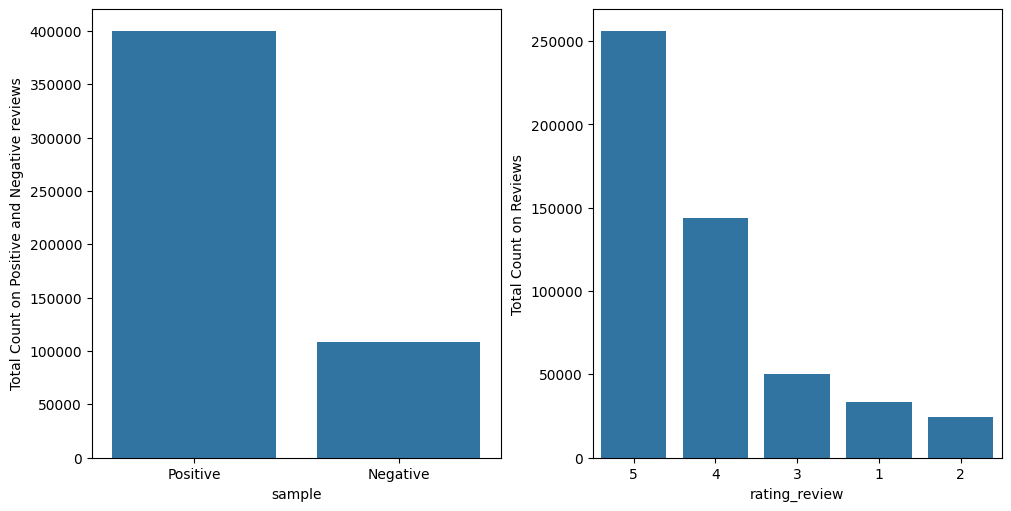

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5),layout="constrained")

#Create a Barplot:
sns.countplot( x= 'sample', data= paris, order=paris['sample'].value_counts().index, ax=ax1)
ax1.set_ylabel("Total Count on Positive and Negative reviews")

sns.countplot( x= 'rating_review', data= paris, order=paris['rating_review'].value_counts().index, ax=ax2)
ax2.set_ylabel("Total Count on Reviews")

Comment:

From the graphs, we see that the Positive Reviews are majority, i.e. people left positive reviews most about the restaurants.

For further analysis, we have to keep in mind that this is a Imbalanced Class Classification for Sentiment Analysis.

### Analysis on 'Restaurant Name' Variable:

In [22]:
paris['restaurant_name'].nunique()

11471

Comment: There are 11471 different restaurant names in Paris covered in this dataset.

### Analysis on Restaurant Reviews:

Frequency Distrubution of Top Tokenized Words:

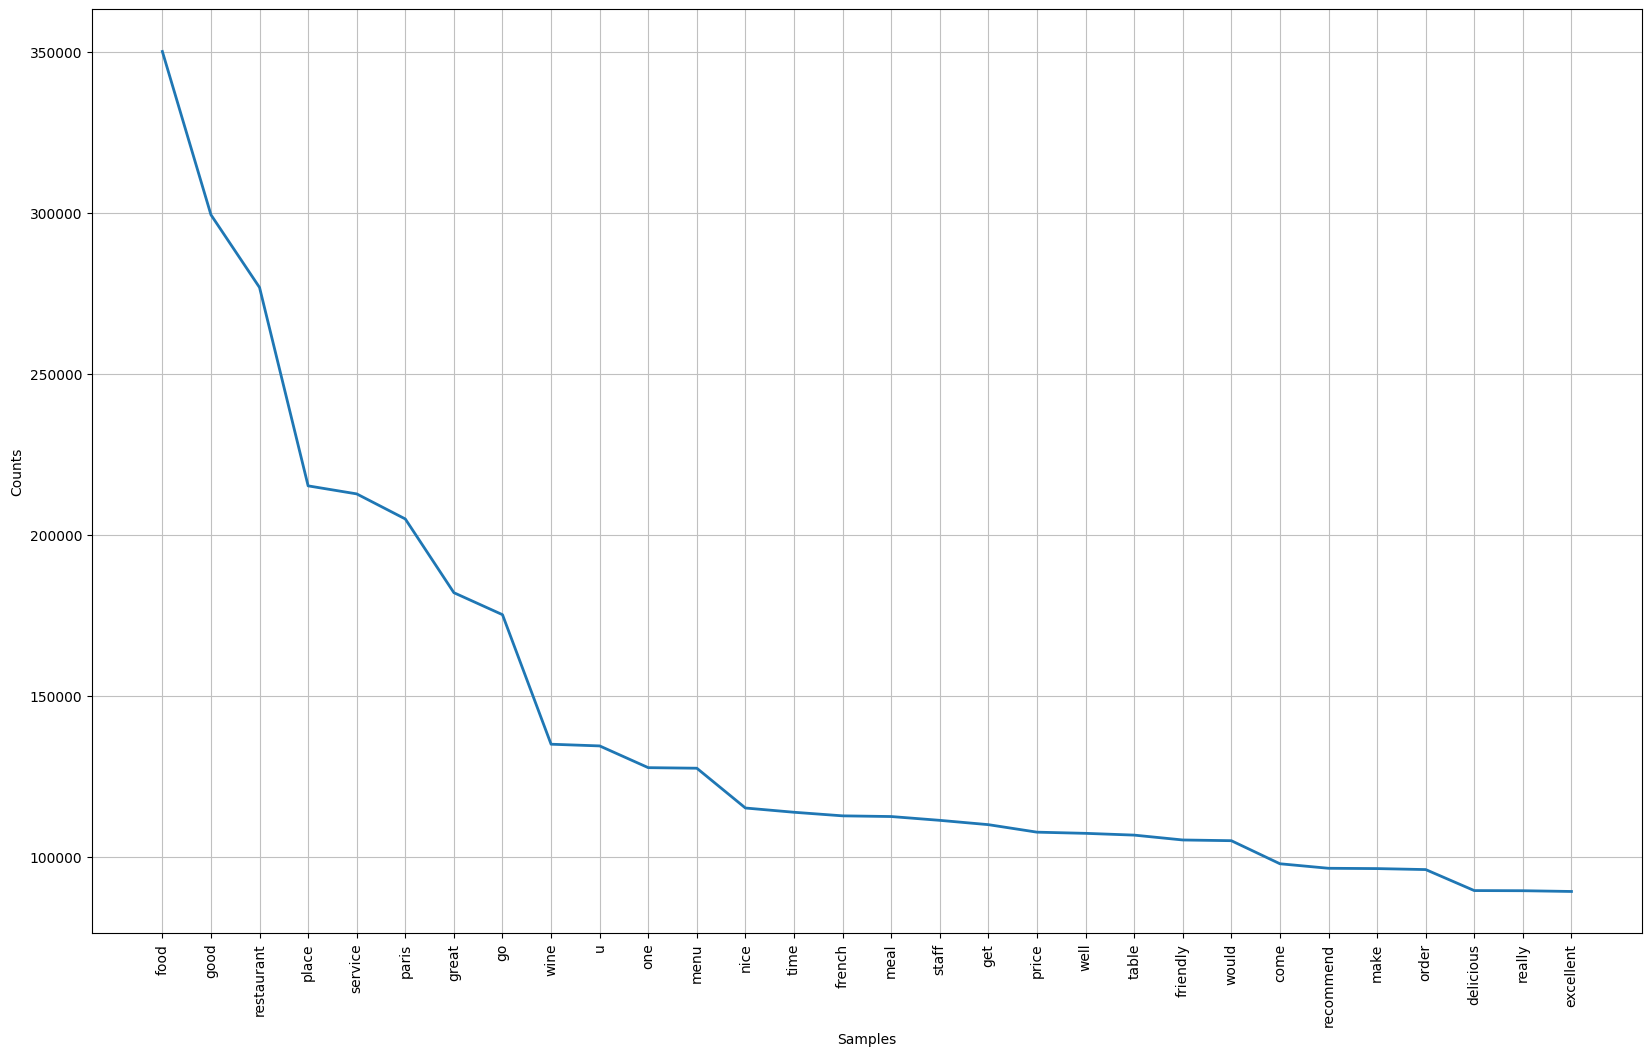

<Axes: xlabel='Samples', ylabel='Counts'>

In [23]:
from nltk.probability import FreqDist

tokenized_words = paris['tokenized'].to_list()

word_list = []
for x in tokenized_words:
    word_list.extend(x)
word_list

freq_dist_text = FreqDist(word_list)
plt.subplots(figsize=(20,12))
freq_dist_text.plot(30)

Top 20 most Common words:

In [24]:
from nltk.probability import FreqDist

freq_dist_text.most_common(20)

[('food', 350139),
 ('good', 299426),
 ('restaurant', 276862),
 ('place', 215261),
 ('service', 212766),
 ('paris', 204984),
 ('great', 182087),
 ('go', 175264),
 ('wine', 135042),
 ('u', 134512),
 ('one', 127761),
 ('menu', 127588),
 ('nice', 115234),
 ('time', 113914),
 ('french', 112799),
 ('meal', 112586),
 ('staff', 111404),
 ('get', 110064),
 ('price', 107733),
 ('well', 107368)]

The above list are the most frequent words in the text.

Wordclouds w.r.to Positive and Negative reviews:

In [25]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

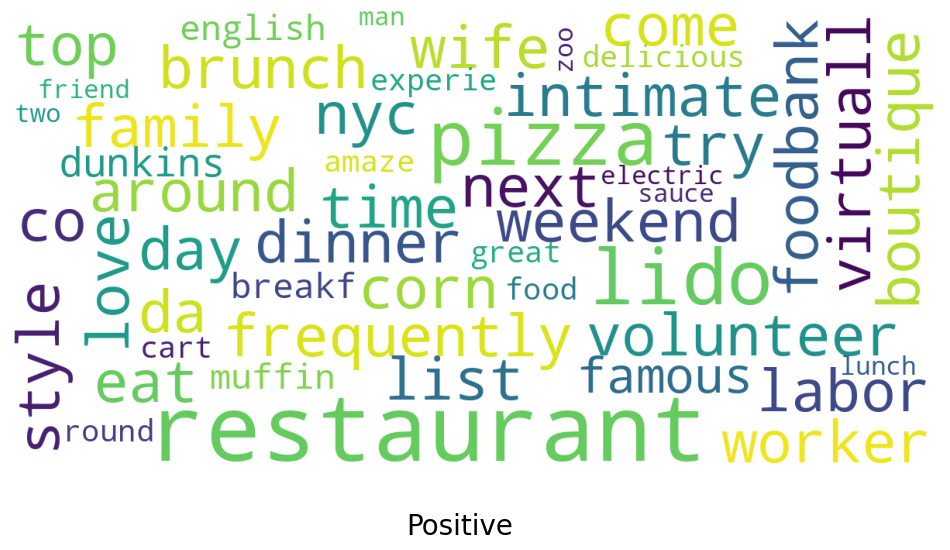

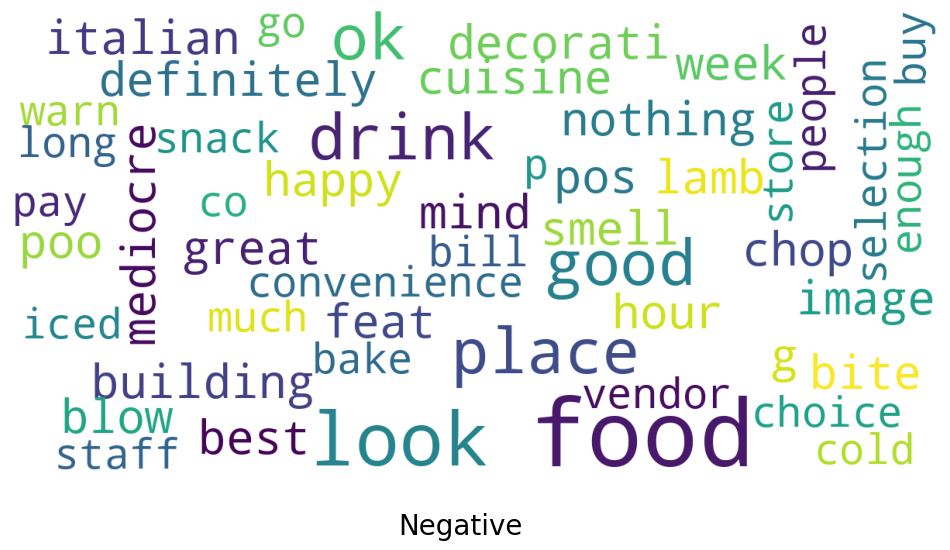

In [ ]:
for rating in list(paris['sample'].unique()):
    show_wordcloud(paris[paris['sample']==rating]['tokenized'], title=rating)

Wordcount by reviews:

<Axes: xlabel='rating_review', ylabel='Word_count'>

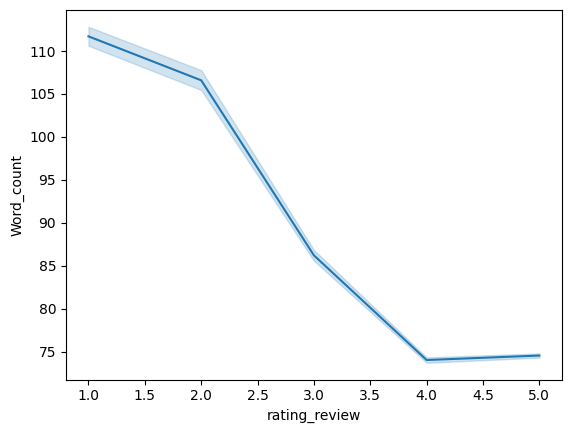

In [26]:
sns.lineplot(x='rating_review', data=paris, y='Word_count')

Observation:

Reviewers with 5 star ratings tend to use less words in their reveiws/ comments, where as people with 1 and 2 star rating tend to use more words to post their reviews.


So, in general we can infer that most people are happy with the service and they post positive reviews. People who are not happy with the services, they post long reviews; but they are less in numbers compared to the number of happy customers.



---



---

